In [1]:
###############
# ML Modeling #
###############

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read transformed data for ML modeling
df2 = pd.read_csv('stroke_train_transformed.csv')
# Remove unnamed column:
df2 = df2.drop(['Unnamed: 0'], axis=1)
# Check dataframe info.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42512 entries, 0 to 42511
Data columns (total 15 columns):
age                        42512 non-null float64
avg_glucose_level          42512 non-null float64
bmi                        42512 non-null float64
smoking_status             42512 non-null int64
gender_Male                42512 non-null int64
gender_Other               42512 non-null int64
hypertension_Yes           42512 non-null int64
heart_disease_Yes          42512 non-null int64
ever_married_Yes           42512 non-null int64
work_type_Never_worked     42512 non-null int64
work_type_Private          42512 non-null int64
work_type_Self-employed    42512 non-null int64
work_type_children         42512 non-null int64
Residence_type_Urban       42512 non-null int64
stroke                     42512 non-null int64
dtypes: float64(3), int64(12)
memory usage: 4.9 MB


In [2]:
################################################
# Resampling: adjustment on imbalanced classes #
# Import libraries for resample
from sklearn.utils import resample

# Separate majority and minority classes
df_major = df2[df2.stroke == 0]
df_minor = df2[df2.stroke == 1]

# Test 2: Downsample majority class
# Downsample majority class: "0" non-stroke patients
df_major_downsampled = resample(df_major, 
                              replace=False, 
                              n_samples=772, 
                              random_state=123)

# Combine minority class with downsampled majority class:
df_downsampled = pd.concat([df_minor,df_major_downsampled], axis=0)

# Display new class counts:
df_downsampled.stroke.value_counts()

1    772
0    772
Name: stroke, dtype: int64

In [3]:
# new downsampled df column names:
_ = df_downsampled.columns
_

Index(['age', 'avg_glucose_level', 'bmi', 'smoking_status', 'gender_Male',
       'gender_Other', 'hypertension_Yes', 'heart_disease_Yes',
       'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'stroke'],
      dtype='object')

In [4]:
#########################################
# QA check on input features/class label#
# Re-define input features:
X = df_downsampled.iloc[:, :-1].values
# Reduced output feature (label): stroke
y = df_downsampled['stroke'].values
# Print unique labels for stroke condition:
print('Class labels:', np.unique(y))

Class labels: [0 1]


In [5]:
###############################################################################
# Data partition: train and test set #
# Use built-in stratify mode to ensure equal % label splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 1/4, random_state = 0, stratify=y)

# Check label counts on the split set:
print('Class labels counts in total:', np.bincount(y))
print('Class labels counts in train set:', np.bincount(y_train))
print('Class labels counts in test set:', np.bincount(y_test))    

Class labels counts in total: [772 772]
Class labels counts in train set: [579 579]
Class labels counts in test set: [193 193]


In [6]:
# Feature Scaling: 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() 
X_train_std = sc_X.fit_transform(X_train) 
X_test_std = sc_X.fit_transform(X_test) 

In [7]:
# Feature Selection: Recursive Feature Elimination #
# Using Logistic Regression:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
from sklearn.feature_selection import RFE
rfe = RFE(lr, 2) 
model = rfe.fit(X_train_std, y_train)
print("Num Features: %d" % rfe.n_features_)
print("Selected Features: %s" % rfe.support_)
print("Feature Ranking: %s" % rfe.ranking_)

Num Features: 2
Selected Features: [ True False False False False False False  True False False False False
 False False]
Feature Ranking: [ 1  3  4  5 10 13  2  1 11  6 12  9  8  7]


In [8]:
# Feature Selection by LogisticReg + RFE #
# Reduced features: age, heart_disease_yes 
X_lr = X[:, [0,7]]

# K-fold Cross-validation: Stratified #
# Logistic Regression:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4, random_state=0)
for train_index, test_index in skf.split(X_lr, y):
    print("TRAIN:", train_index,  "TEST:", test_index)
    X_train_lr, X_test_lr = X_lr[train_index], X_lr[test_index]
    y_train_lr, y_test_lr = y[train_index], y[test_index]

TRAIN: [ 193  194  195 ..., 1541 1542 1543] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 772 773 774 775 776
 777 778 779 780 781 782 783 784 785 786 787 788 789 790 791 792 793 794
 795 796 797 798 799 800 801 802 803 804 805 806 807 808 809 810 811 812
 

In [9]:
################################
# Model 1: Logistic Regression #
################################
# Feature Scaling: Logistic Regression
X_train_lr = sc_X.fit_transform(X_train_lr) 
X_test_lr = sc_X.fit_transform(X_test_lr) 

# Model: Logistic Regression
lr_cv = LogisticRegression(random_state=0)
lr_cv.fit(X_train_lr, y_train_lr)

# Model prediction result: cv. testset
y_pred_test_lr = lr_cv.predict(X_test_lr)

 1) age                            0.907889
 2) avg_glucose_level              0.043466
 3) bmi                            0.036179
 4) heart_disease_Yes              0.006942
 5) work_type_Self-employed        0.005523
 6) Residence_type_Urban           0.000000
 7) work_type_children             0.000000
 8) work_type_Private              0.000000
 9) work_type_Never_worked         0.000000
10) ever_married_Yes               0.000000
11) hypertension_Yes               0.000000
12) gender_Other                   0.000000
13) gender_Male                    0.000000
14) smoking_status                 0.000000


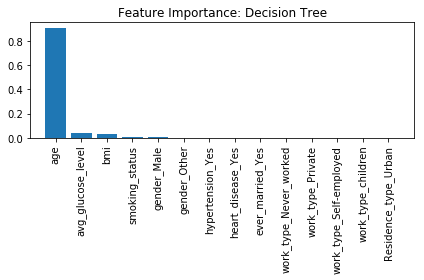

In [10]:
# Feature Selection: Feature Importance #
# Using a Decision Tree:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',
                                max_depth=4,
                                random_state=0)
feat_labels = df_downsampled.columns[:-1]
tree.fit(X_train, y_train)
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.title('Feature Importance: Decision Tree')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels, rotation=90)
plt.xlim(-1, X_train.shape[1])
plt.tight_layout()
plt.show()

In [11]:
# Feature Selection by DT Classifier: age and avg_glucose_level
X_dt = X[:, [0,1]]

# K-fold Cross-validation: Stratified #
# DecisionTree Classifier:
for train_index, test_index in skf.split(X_dt, y):
#   print("TRAIN:", train_index,  "TEST:", test_index)
    X_train_dt, X_test_dt = X_dt[train_index], X_dt[test_index]
    y_train_dt, y_test_dt = y[train_index], y[test_index]

In [12]:
####################################
# Model 2: DecisionTree Classifier #
####################################
# Feature Scaling: DecisionTree 
X_train_dt = sc_X.fit_transform(X_train_dt) 
X_test_dt = sc_X.fit_transform(X_test_dt) 

# Model: DecisionTree [cross-validated & std. train set]
tree_cv = DecisionTreeClassifier(criterion='gini',
                                max_depth=4,
                                random_state=0)
tree_cv.fit(X_train_dt, y_train_dt)

# Model prediction result: cv. testset
y_pred_test_dt = tree_cv.predict(X_test_dt)

 1) age                            0.381633
 2) avg_glucose_level              0.192421
 3) bmi                            0.167183
 4) ever_married_Yes               0.043117
 5) smoking_status                 0.037051
 6) heart_disease_Yes              0.034869
 7) hypertension_Yes               0.030021
 8) Residence_type_Urban           0.025759
 9) work_type_children             0.025182
10) gender_Male                    0.022330
11) work_type_Self-employed        0.020412
12) work_type_Private              0.019735
13) work_type_Never_worked         0.000287
14) gender_Other                   0.000000


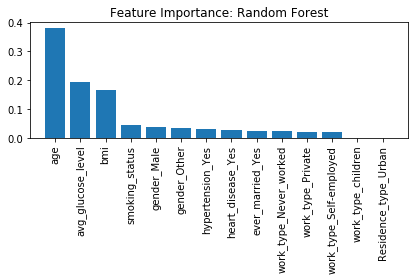

In [13]:
# Feature Selection: Feature Importance #
# Using a Random Forest:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25,
                                random_state=0,
                                n_jobs=1)
feat_labels = df_downsampled.columns[:-1]
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.title('Feature Importance: Random Forest')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels, rotation=90)
plt.xlim(-1, X_train.shape[1])
plt.tight_layout()
plt.show()

In [14]:
# Feature Selection by RF Classifier: age and avg_glucose_level
X_rf = X[:, [0,1]]

# K-fold Cross-validation: Stratified #
# RandomForest Classifier:
for train_index, test_index in skf.split(X_rf, y):
#   print("TRAIN:", train_index,  "TEST:", test_index)
    X_train_rf, X_test_rf = X_rf[train_index], X_rf[test_index]
    y_train_rf, y_test_rf = y[train_index], y[test_index]

In [15]:
####################################
# Model 3: RandomForest Classifier #
####################################
# Feature Scaling: RandomForest 
X_train_rf = sc_X.fit_transform(X_train_rf) 
X_test_rf = sc_X.fit_transform(X_test_rf) 

# Model: RandomForest [cross-validated & std. train set]
forest_cv = RandomForestClassifier(criterion='gini',
                                n_estimators=25,
                                random_state=0,
                                n_jobs=1)
forest_cv.fit(X_train_rf, y_train_rf)

# Model prediction result: cv. testset
y_pred_test_rf = forest_cv.predict(X_test_rf)

In [16]:
# Making the Confusion/Contingency Matrix #
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Write plot_confusion_matrix function #
def plot_confusion_matrix(cm):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i, s=cm[i,j],va='center',ha='center')
        plt.xlabel('predicted label')
        plt.ylabel('true label')

# Confusion Matrix on 3 ML models:
cm_test_lr = confusion_matrix(y_test_lr, y_pred_test_lr)  
cm_test_dt = confusion_matrix(y_test_dt, y_pred_test_dt)  
cm_test_rf = confusion_matrix(y_test_rf, y_pred_test_rf)

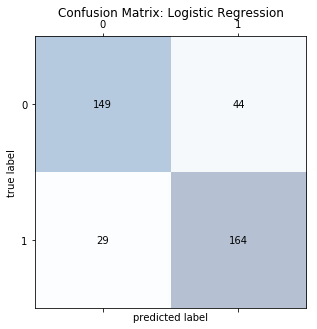

Precision: 0.788
Recall: 0.850


In [17]:
# Plot confusion matrix: Logistic Regression
plot_confusion_matrix(cm_test_lr)
plt.title('Confusion Matrix: Logistic Regression')
plt.show()

# Report Recall and Precision: Logistic Regression
print('Precision: %.3f' % precision_score(
y_true=y_test_lr, y_pred=y_pred_test_lr))

print('Recall: %.3f' % recall_score(
y_true=y_test_lr, y_pred=y_pred_test_lr))

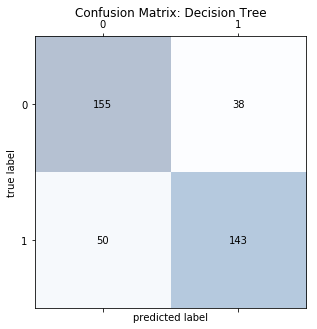

Precision: 0.790
Recall: 0.741


In [18]:
# Plot confusion matrix: Decision Tree
plot_confusion_matrix(cm_test_dt)
plt.title('Confusion Matrix: Decision Tree')
plt.show()

# Report Recall and Precision: Decision Tree
print('Precision: %.3f' % precision_score(
y_true=y_test_dt, y_pred=y_pred_test_dt))

print('Recall: %.3f' % recall_score(
y_true=y_test_dt, y_pred=y_pred_test_dt))

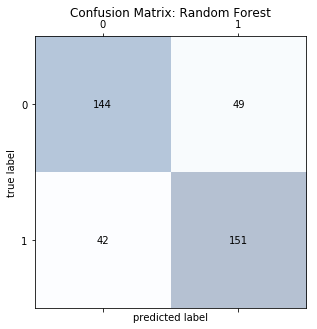

Precision: 0.755
Recall: 0.782


In [19]:
# Plot confusion matrix: Random Forest
plot_confusion_matrix(cm_test_rf)
plt.title('Confusion Matrix: Random Forest')
plt.show()

# Report Recall and Precision: Random Forest
print('Precision: %.3f' % precision_score(
y_true=y_test_rf, y_pred=y_pred_test_rf))

print('Recall: %.3f' % recall_score(
y_true=y_test_rf, y_pred=y_pred_test_rf))

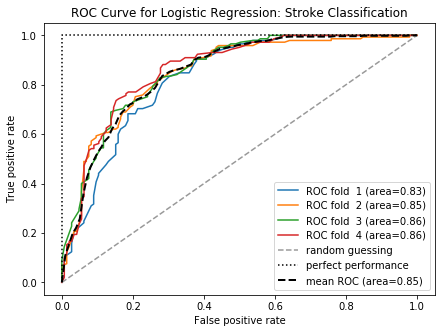

In [20]:
# Plotting ROC Curve #
# Logistic Regression: ROC fold and Mean ROC
from sklearn.metrics import roc_curve, auc
from scipy import interp

# Make a list of Stratified Fold: Logistic Regression
cv = list(skf.split(X_train_lr, y_train_lr))
# Figure Setting and Initialize Parameters:
fig = plt.figure(figsize=(7,5))
mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)
all_trp = []

for i, (train,test) in enumerate(cv):
    prob = lr_cv.fit(X_train_lr[train],y_train_lr[train]).predict_proba(X_train_lr[test])
    fpr,tpr,thresholds = roc_curve(y_train_lr[test],
                                   prob[:,1],
                                   pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,label='ROC fold % d (area=%0.2f)' % (i+1, roc_auc))
    
plt.plot([0,1],[0,1],linestyle='--',
    color=(0.6,0.6,0.6),label='random guessing')

plt.plot([0,0,1],[0,1,1],linestyle=':',
    color='black',label='perfect performance')
    
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr,mean_tpr)
    
plt.plot(mean_fpr,mean_tpr,'k--',
    label='mean ROC (area=%0.2f)' % mean_auc, lw=2)
        
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve for Logistic Regression: Stroke Classification')
plt.legend(loc='lower right')
plt.show()

In [21]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Write plot_decision_regions function #
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # Setup marker generator and colormap
    markers = ('o','o','s','^','v')
    colors = ('red','green','blue','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Plot decision surface
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, edgecolor='black')

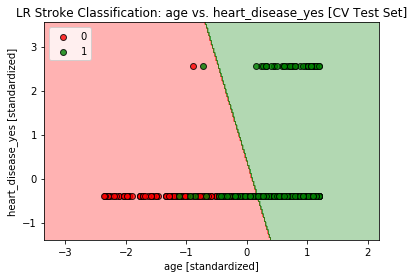

In [22]:
# Visualize stroke classification: Logistic Regression #
# Downsampled test set:
plot_decision_regions(X=X_test_lr, y=y_test_lr, classifier=lr_cv, test_idx=None)
plt.title('LR Stroke Classification: age vs. heart_disease_yes [CV Test Set]')
plt.xlabel('age [standardized]')
plt.ylabel('heart_disease_yes [standardized]')
plt.legend(loc='upper left')
plt.show()

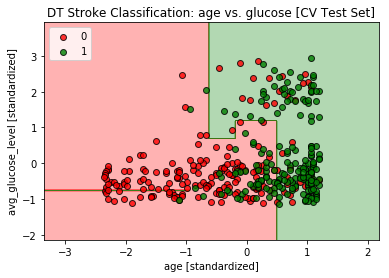

In [23]:
# Visualize stroke classification: Decision Tree #
# Downsampled test set:
plt.figure()
plot_decision_regions(X=X_test_dt, y=y_test_dt, classifier=tree_cv, test_idx=None)
plt.title('DT Stroke Classification: age vs. glucose [CV Test Set]')
plt.xlabel('age [standardized]')
plt.ylabel('avg_glucose_level [standardized]')
plt.legend(loc='upper left')
plt.show()

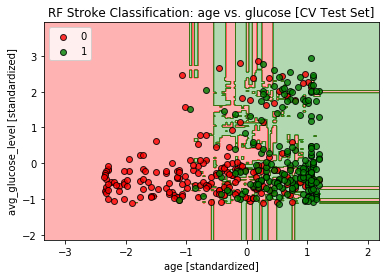

In [24]:
# Visualize stroke classification: Random Forest #
# Downsampled test set:
plot_decision_regions(X=X_test_rf, y=y_test_rf, classifier=forest_cv, test_idx=None)
plt.title('RF Stroke Classification: age vs. glucose [CV Test Set]')
plt.xlabel('age [standardized]')
plt.ylabel('avg_glucose_level [standardized]')
plt.legend(loc='upper left')
plt.show()